In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from calibration.calibration import FilmCalibration

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 14})

In [3]:
calibracion = FilmCalibration.from_json("calibracion_test.json")

In [4]:
for key, value in calibracion.__dict__.items():
    #print(f"{key}: {value}")
    continue

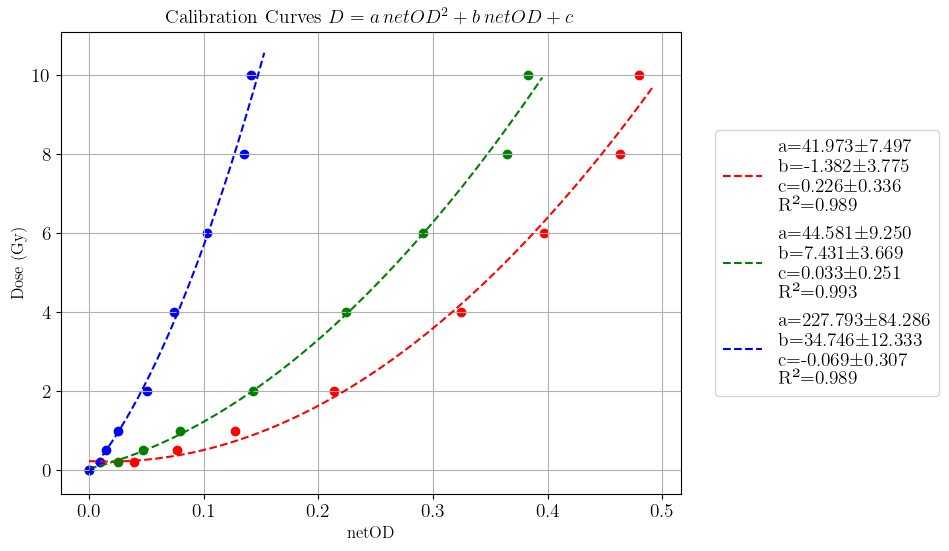

In [5]:
calibracion.graph_calibration_curve()

In [6]:
# isntall cv2
!pip install opencv-python

You should consider upgrading via the 'C:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\venv39\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
film_path = os.path.join("media", "mama100cropped_squared.tif")
# resize

dose_map = calibracion.compute_dose_map(film_path, channel=2)

print(dose_map)

[[0.23207427 0.50156425 0.50156425 ... 0.23207427 0.10650739 0.10650739]
 [0.23207427 0.50156425 0.50156425 ... 0.50156425 0.10650739 0.10650739]
 [0.36371509 0.50156425 0.50156425 ... 0.50156425 0.36371509 0.36371509]
 ...
 [0.64575997 0.50156425 0.64575997 ... 0.79644437 0.79644437 0.79644437]
 [0.95376366 0.64575997 0.64575997 ... 0.79644437 0.79644437 0.64575997]
 [0.79644437 0.64575997 0.64575997 ... 0.79644437 0.64575997 0.64575997]]


In [8]:
a = dose_map.flatten()
print(a)
print(len(a))


b = np.sort(a)
print(b[-1000:])

[0.23207427 0.50156425 0.50156425 ... 0.79644437 0.64575997 0.64575997]
262144
[4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.2234971
 4.2234971  4.2234971  4.2234971  4.2234971  4.2234971  4.22349

In [9]:
dose_map.min()

np.float64(-0.12692405580210742)

In [10]:
dose_map.max()

np.float64(5.115491156079334)

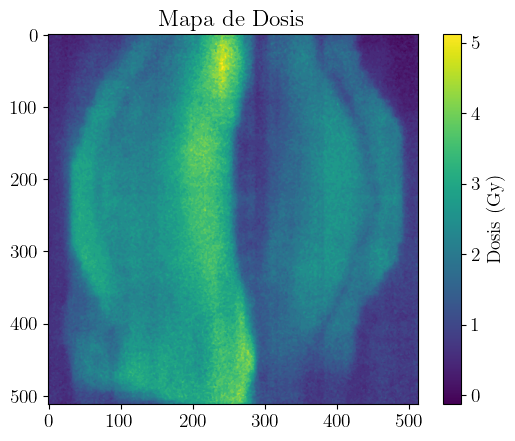

In [11]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map)  # cmap='jet' o la que prefieras
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.show()


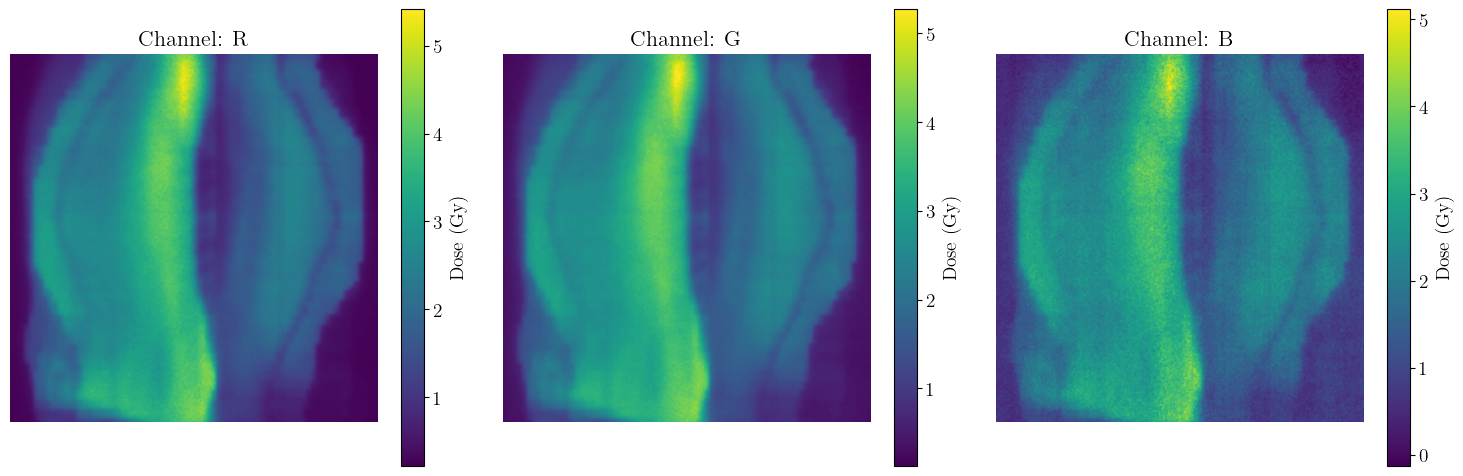

In [12]:
dose_maps = [None]*3
for i in range(3):
    dose_maps[i] = calibracion.compute_dose_map(film_path, channel=i)

import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    # Guardas el objeto de tipo AxesImage que retorna imshow
    im = axs[i].imshow(dose_maps[i])
    axs[i].set_title(f'Channel: {canales[i]}', fontsize=16)
    # Aquí creas la barra de color para 'im' asociándola al eje axs[i]
    fig.colorbar(im, ax=axs[i], label='Dose (Gy)')
    # O también podrías usar plt.colorbar(im, ax=axs[i], label='Dosis (Gy)')

    # Corrige la llamada a set_axis_off (que es un método y se ejecuta con paréntesis)
    axs[i].set_axis_off()

plt.tight_layout()
plt.show()


In [13]:
# Exportar cadaa uno de los mapas de dosis como mapa de dosis

for i in range(3):
    np.save(f'dose_map_channel_{i}.npy', dose_maps[i])



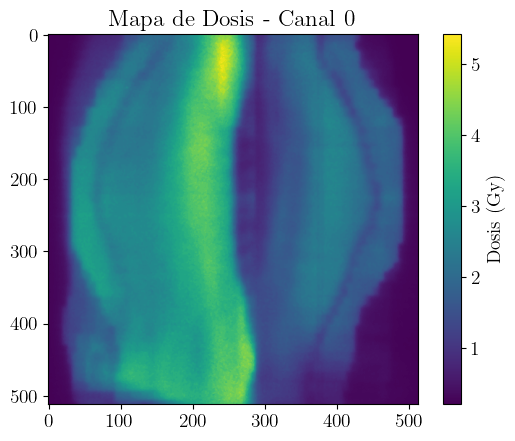

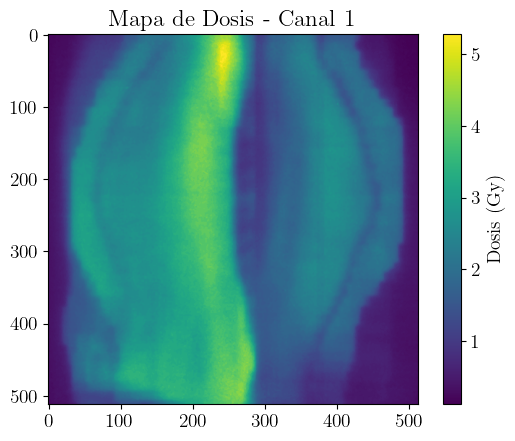

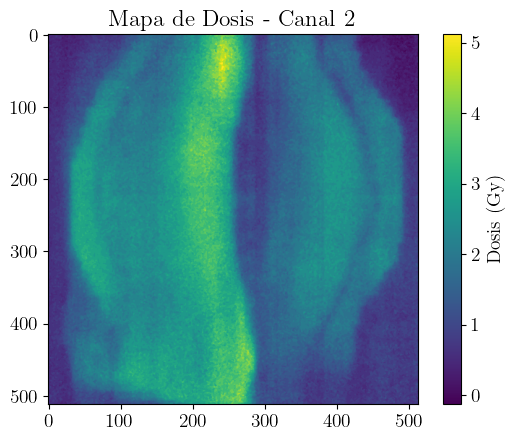

In [14]:
# Importar los mapas de dosis y graficarlos

for i in range(3):
    dose_map = np.load(f'dose_map_channel_{i}.npy')
    plt.imshow(dose_map)
    plt.colorbar(label='Dosis (Gy)')
    plt.title(f'Mapa de Dosis - Canal {i}')
    plt.show()

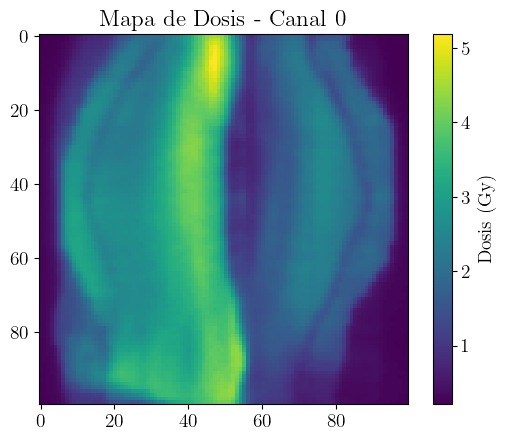

In [15]:
# resize un mapa de dosis a otra dimensión
from skimage.transform import resize

dose_map = np.load('dose_map_channel_0.npy')
dose_map_resized = resize(dose_map, (100, 100), anti_aliasing=True)
plt.imshow(dose_map_resized)
plt.colorbar(label='Dosis (Gy)')
plt.title('Mapa de Dosis - Canal 0')
plt.show()

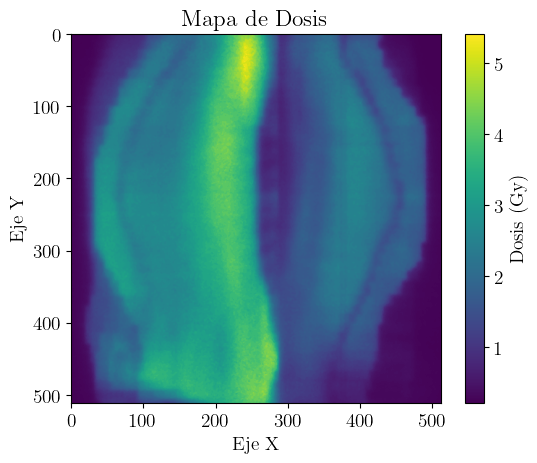

In [16]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map)  # cmap='jet' o la que prefieras
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


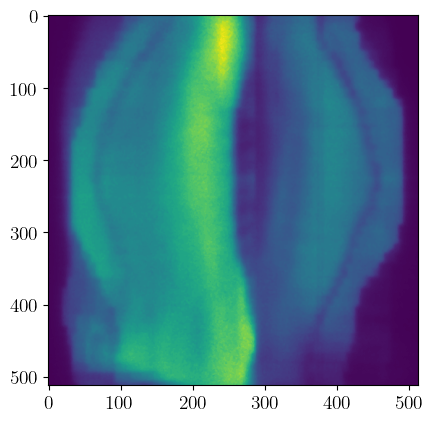

In [17]:
# plot dose map

import matplotlib.pyplot as plt

plt.imshow(dose_map)

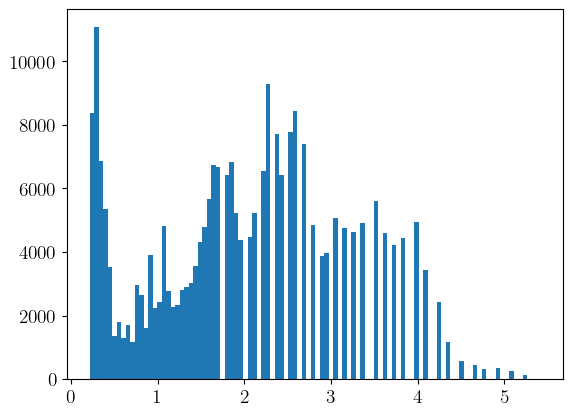

In [18]:
# histograma del mapa
plt.figure()
plt.hist(dose_map.flatten(), bins=100)
plt.show()